# Capstone Project - The Battle of Neighborhood

## Clustering Paris and Marseille districts: restaurant location ##

### Introduction

#### Background

Choosing a location for a business is difficult yet critical decision that may have a huge impact on the business profitability. This is especially important for restaurants as customers often use proximity as a very important factor in making decisions where to eat out. Therefore, for a restaurant to be successful it is crucial to understand the neighbourhood profile to be able to adjust the service and menu to meet the clients' needs and, in turn, to make the restaurant profitable.

This project focuses on two largest cities in France: Paris and Marseille. The city of Paris is divided into twenty administrative districts, arrondissements municipaux, referred to later in this document interchangeably as arrondissements or districts. Marseille is divided into sixteen districts. These districts will be described using different features and then clustered to provide useful insights about their profiles and to find similar/dissimilar groups.



#### Problem

This project aims at segmenting and clustering the arrondissements of Paris and Marseille to find similar districts in terms of characteristic of venue types in district. 

#### Audience

The results of this project may be useful to:
- New/future business owners to help them deciding in which district they should open a business or how to choose the restaurant type and menu to best address the local needs 
- Existing business owners that are considering either moving to a different arrondissement or opening another location. If their current business is successful, they may want to consider opening a restaurant in a similar district. If not, clustering may provide useful insights on possible modification in the target market to make the business more profitable or identify potentially better locations.


### Data

#### Overview

I searched in the Internet for potentially useful data. I identified a few data sources listed below. I will be performing web scraping or copy/paste to extract the relevant features. In case of Foursquare places database, I will use my developer account to retrieve relevant venues. 

Below, there is a list of data sources I found to be potentially interested for the purpose of this project:
- https://opendata.paris.fr/explore/dataset/arrondissements/table - This data source includes districts' number and name, longitude and latitude, area, and perimeter 

- https://en.wikipedia.org/wiki/Arrondissements_of_Paris - This data source includes each district’s population from 1999 and 2005 as well as population density from 2005

- https://frenchmoments.eu/arrondissements-of-paris/ - This data source includes each district’s population from 2013, population density, and median household income 

- https://public.opendatasoft.com/explore/dataset/arrondissements-millesimes0/table/ - This data includes district names, longitude and latitude for a few large cities in France, including Paris and Marseille 

- https://developer.foursquare.com/ - Foursquare Places Database includes community-based venues data which can be queried for each arrondissement using longitude and latitude values


I initially planned on using venues data along with population and socio-economic data to describe each district. However, with limited time for completing this project I ran into issues with obtaining the same type of data for Paris and Marseille. Consequently, I ended up using data from last two data sources.

## Data Preparation - Exploratory Data Analysis

### Data from opendata Paris

In [136]:
import pandas as pd
districts_P_open_data = pd.read_csv(r"C:\Users\wstac\Documents\projects\Coursera_Capstone\Paris_Districts.csv")
districts_France = pd.read_csv(r"C:\Users\wstac\Documents\projects\Coursera_Capstone\France_Districts.csv", delimiter=';')
density_PM = pd.read_csv(r"C:\Users\wstac\Documents\projects\Coursera_Capstone\Paris_Marseille_Density.csv")
districts_France.head()

,Geo Point,Geo Shape,ID_GEOFLA,Code Commune,Code Insee,Commune,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,Y_CENTROID,...,Code D̩épartement,Ann̩ée,R̩égion,D̩épartement,Statut,Code R̩égion,NOM_REG,CODE_COM,NOM_COM,CODE_VILLE
0,"43.3117424276,5.37932471314","{""type"": ""Polygon"", ""coordinates"": [[[5.371576...",COMMUNE00000000000024984,203,13203,MARSEILLE-3E-ARRONDISSEMENT,891993,6247255,893005,6248894,...,13,2016,PROVENCE-ALPES-COTE D'AZUR,BOUCHES-DU-RHONE,Commune simple,93,PROVENCE-ALPES-COTE D'AZUR,203,MARSEILLE-3E-ARRONDISSEMENT,13055
1,"43.3448642111,5.39338098888","{""type"": ""Polygon"", ""coordinates"": [[[5.371576...",COMMUNE00000000000030916,214,13214,MARSEILLE-14E-ARRONDISSEMENT,893047,6252491,894137,6252471,...,13,2016,PROVENCE-ALPES-COTE D'AZUR,BOUCHES-DU-RHONE,Commune simple,93,PROVENCE-ALPES-COTE D'AZUR,214,MARSEILLE-14E-ARRONDISSEMENT,13055
2,"48.8491121688,2.33284677548","{""type"": ""Polygon"", ""coordinates"": [[[2.316628...",COMMUNE00000000000032064,106,75106,PARIS-6E-ARRONDISSEMENT,651008,6861403,651135,6861391,...,75,2016,ILE-DE-FRANCE,PARIS,Commune simple,11,ILE-DE-FRANCE,106,PARIS-6E-ARRONDISSEMENT,75056
3,"45.7566434898,4.80314551427","{""type"": ""Polygon"", ""coordinates"": [[[4.819694...",COMMUNE00000000000023511,385,69385,LYON-5E-ARRONDISSEMENT,840023,6519170,840260,6519255,...,69,2016,AUVERGNE-RHONE-ALPES,RHONE,Commune simple,84,AUVERGNE-RHONE-ALPES,385,LYON-5E-ARRONDISSEMENT,69123
4,"43.3066947635,5.4011177563","{""type"": ""Polygon"", ""coordinates"": [[[5.389079...",COMMUNE00000000000021448,204,13204,MARSEILLE-4E-ARRONDISSEMENT,894762,6247235,894953,6248462,...,13,2016,PROVENCE-ALPES-COTE D'AZUR,BOUCHES-DU-RHONE,Commune simple,93,PROVENCE-ALPES-COTE D'AZUR,204,MARSEILLE-4E-ARRONDISSEMENT,13055


In [237]:
density_PM.head()

,City,Arrondissement_Nbr,City_L_AR,Arrondissement,Name,Area,Population,Density\,Density_Norm
0,PARIS,1E,PARIS-1E,1st,Louvre,1.826,17700,9693,0.212533
1,PARIS,2E,PARIS-2E,2nd,Bourse,0.992,20700,20867,0.488326
2,PARIS,3E,PARIS-3E,3rd,Temple,1.171,35100,29974,0.713101
3,PARIS,4E,PARIS-4E,4th,Hôtel-de-Ville,1.601,28600,17864,0.414207
4,PARIS,5E,PARIS-5E,5th,Panthéon,2.541,60600,23849,0.561926


Let's start with crating data frame with columns of our interest that include geo location data as well as districts name and city codes

In [238]:
all_cities_tmp = districts_France[["Geo Point","NOM_COM", "CODE_VILLE"]]
cols = all_cities_tmp.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, str)) else x)
all_cities_tmp.columns = cols
all_cities_tmp.head()

,Geo_Point,NOM_COM,CODE_VILLE
0,"43.3117424276,5.37932471314",MARSEILLE-3E-ARRONDISSEMENT,13055
1,"43.3448642111,5.39338098888",MARSEILLE-14E-ARRONDISSEMENT,13055
2,"48.8491121688,2.33284677548",PARIS-6E-ARRONDISSEMENT,75056
3,"45.7566434898,4.80314551427",LYON-5E-ARRONDISSEMENT,69123
4,"43.3066947635,5.4011177563",MARSEILLE-4E-ARRONDISSEMENT,13055


OK. Now, let's split the column with latitide and longitude into two separate columns and convert the strings to floats. In addition, let's clean some column headers

In [239]:
#print(districts_Par)
all_cities_tmp[['Latitude','Longitude']] = all_cities_tmp.Geo_Point.str.split(",",expand=True,)
all_cities_tmp[['VILLE','Nbr_Str','Type']] = all_cities_tmp.NOM_COM.str.split("-",expand=True,)
all_cities_tmp.loc[:,'Nbr'] = all_cities_tmp.Nbr_Str.str.replace('[^\d]', '').astype(int)
all_cities_tmp.loc[:,"Longitude"] = all_cities_tmp["Longitude"].astype(float)
all_cities_tmp.loc[:,"Latitude"] = all_cities_tmp["Latitude"].astype(float)
all_cities_tmp.drop(columns =["Geo_Point"], inplace = True) 
all_cities_tmp.rename(columns={"Nbr_Str": "L_AR"}, inplace=True)

In [240]:
print(all_cities_tmp.head())

                        NOM_COM  CODE_VILLE   Latitude  Longitude      VILLE  \
0   MARSEILLE-3E-ARRONDISSEMENT       13055  43.311742   5.379325  MARSEILLE   
1  MARSEILLE-14E-ARRONDISSEMENT       13055  43.344864   5.393381  MARSEILLE   
2       PARIS-6E-ARRONDISSEMENT       75056  48.849112   2.332847      PARIS   
3        LYON-5E-ARRONDISSEMENT       69123  45.756643   4.803146       LYON   
4   MARSEILLE-4E-ARRONDISSEMENT       13055  43.306695   5.401118  MARSEILLE   

  L_AR            Type  Nbr  
0   3E  ARRONDISSEMENT    3  
1  14E  ARRONDISSEMENT   14  
2   6E  ARRONDISSEMENT    6  
3   5E  ARRONDISSEMENT    5  
4   4E  ARRONDISSEMENT    4  


Let's create two different data frames with data for Paris and Marseille, respectively, by filtering the above data frame

In [241]:
districts_Par = all_cities_tmp[all_cities_tmp['CODE_VILLE']==75056]
districts_Mar = all_cities_tmp[all_cities_tmp['CODE_VILLE']==13055]
districts_Par.sort_values(by='Nbr', inplace=True)
districts_Par.reset_index(drop=True, inplace=True)
districts_Mar.sort_values(by='Nbr', inplace=True)
districts_Mar.reset_index(drop=True, inplace=True)

C:\Users\wstac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wstac\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [242]:
print(districts_Par.head())

                    NOM_COM  CODE_VILLE   Latitude  Longitude  VILLE L_AR  \
0  PARIS-1ER-ARRONDISSEMENT       75056  48.862526   2.336301  PARIS  1ER   
1   PARIS-2E-ARRONDISSEMENT       75056  48.868218   2.342690  PARIS   2E   
2   PARIS-3E-ARRONDISSEMENT       75056  48.862885   2.359932  PARIS   3E   
3   PARIS-4E-ARRONDISSEMENT       75056  48.854287   2.357596  PARIS   4E   
4   PARIS-5E-ARRONDISSEMENT       75056  48.844409   2.350498  PARIS   5E   

             Type  Nbr  
0  ARRONDISSEMENT    1  
1  ARRONDISSEMENT    2  
2  ARRONDISSEMENT    3  
3  ARRONDISSEMENT    4  
4  ARRONDISSEMENT    5  


In [8]:
print(districts_Mar.head())

                        NOM_COM  CODE_VILLE   Latitude  Longitude      VILLE  \
0  MARSEILLE-1ER-ARRONDISSEMENT       13055  43.299929   5.383042  MARSEILLE   
1   MARSEILLE-2E-ARRONDISSEMENT       13055  43.312716   5.363439  MARSEILLE   
2   MARSEILLE-3E-ARRONDISSEMENT       13055  43.311742   5.379325  MARSEILLE   
3   MARSEILLE-4E-ARRONDISSEMENT       13055  43.306695   5.401118  MARSEILLE   
4   MARSEILLE-5E-ARRONDISSEMENT       13055  43.292401   5.397865  MARSEILLE   

  L_AR            Type  Nbr  
0  1ER  ARRONDISSEMENT    1  
1   2E  ARRONDISSEMENT    2  
2   3E  ARRONDISSEMENT    3  
3   4E  ARRONDISSEMENT    4  
4   5E  ARRONDISSEMENT    5  


**Now let's do the final check if we don't have missing data or anything else that looks incorrect** 

In [202]:
districts_Par.describe()

,CODE_VILLE,Latitude,Longitude,Nbr
count,20.0,20.000000,20.000000,20.00000
mean,75056.0,48.860289,2.344424,10.50000
std,0.0,0.018824,0.037406,5.91608
min,75056.0,48.828271,2.261903,1.00000
25%,75056.0,48.847936,2.323191,5.75000
50%,75056.0,48.861497,2.345287,10.50000
75%,75056.0,48.873608,2.361115,15.25000
max,75056.0,48.892480,2.421029,20.00000


In [203]:
districts_Mar.describe()

,CODE_VILLE,Latitude,Longitude,Nbr
count,16.0,16.000000,16.000000,16.000000
mean,13055.0,43.303741,5.396814,8.500000
std,0.0,0.037853,0.042068,4.760952
min,13055.0,43.234365,5.312824,1.000000
25%,13055.0,43.285737,5.372212,4.750000
50%,13055.0,43.303312,5.388211,8.500000
75%,13055.0,43.320753,5.428920,12.250000
max,13055.0,43.365446,5.483670,16.000000


**Let's do the fun part: visualize the districts of Paris**

In [9]:
!pip -q install folium
import folium
from geopy.geocoders import Nominatim

address = 'Paris, France'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, district in zip(districts_Par['Latitude'], districts_Par['Longitude'], districts_Par['L_AR']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

**And now the districts of Marseille**

In [10]:
address_M = 'Marseille, France'

geolocator = Nominatim(user_agent="ny_explorer")
location_M = geolocator.geocode(address_M)
latitude_M = location_M.latitude
longitude_M = location_M.longitude

# create map of Marseille using latitude and longitude values
map_marseille = folium.Map(location=[latitude_M, longitude_M], zoom_start=10)

# add markers to map
for lat, lng, district in zip(districts_Mar['Latitude'], districts_Mar['Longitude'], districts_Mar['L_AR']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_marseille)  
    
map_marseille

**Foursquare API login credentials**

In [11]:
CLIENT_ID = 'R2KPCGXU302F3R04L5A0HSRG4JGIAA3G3ZT3K2C5MPNCY4R5' # your Foursquare ID
CLIENT_SECRET = 'VOM1TFXBBAEG2XRC5RDSB5TSWT5ERX5VOUNJPVUU1G431KLB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R2KPCGXU302F3R04L5A0HSRG4JGIAA3G3ZT3K2C5MPNCY4R5
CLIENT_SECRET:VOM1TFXBBAEG2XRC5RDSB5TSWT5ERX5VOUNJPVUU1G431KLB


In [21]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
paris_venues = getNearbyVenues(names=districts_Par['L_AR'],
                                   latitudes=districts_Par['Latitude'],
                                   longitudes=districts_Par['Longitude']
                                  )

1ER
2E
3E
4E
5E
6E
7E
8E
9E
10E
11E
12E
13E
14E
15E
16E
17E
18E
19E
20E


In [23]:
marseille_venues = getNearbyVenues(names=districts_Mar['L_AR'],
                                   latitudes=districts_Mar['Latitude'],
                                   longitudes=districts_Mar['Longitude']
                                  )

1ER
2E
3E
4E
5E
6E
7E
8E
9E
10E
11E
12E
13E
14E
15E
16E


**Create new dataframe with appended Paris and Marseille data**

In [44]:
districts_Par_Mar = pd.concat([districts_Par,districts_Mar],ignore_index=True)
districts_Par_Mar['L_V_AR'] = districts_Par_Mar.apply(lambda row: row.VILLE + '-' + row.L_AR, axis=1)

paris_marseille_venues = getNearbyVenues(names=districts_Par_Mar['L_V_AR'],
                                   latitudes=districts_Par_Mar['Latitude'],
                                   longitudes=districts_Par_Mar['Longitude']
                                  )


PARIS-1ER
PARIS-2E
PARIS-3E
PARIS-4E
PARIS-5E
PARIS-6E
PARIS-7E
PARIS-8E
PARIS-9E
PARIS-10E
PARIS-11E
PARIS-12E
PARIS-13E
PARIS-14E
PARIS-15E
PARIS-16E
PARIS-17E
PARIS-18E
PARIS-19E
PARIS-20E
MARSEILLE-1ER
MARSEILLE-2E
MARSEILLE-3E
MARSEILLE-4E
MARSEILLE-5E
MARSEILLE-6E
MARSEILLE-7E
MARSEILLE-8E
MARSEILLE-9E
MARSEILLE-10E
MARSEILLE-11E
MARSEILLE-12E
MARSEILLE-13E
MARSEILLE-14E
MARSEILLE-15E
MARSEILLE-16E


In [45]:
print(paris_venues.shape)
paris_venues.head()

(1374, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1ER,48.862526,2.336301,Musée du Louvre,48.860847,2.336440,Art Museum
1,1ER,48.862526,2.336301,Palais Royal,48.863236,2.337127,Historic Site
2,1ER,48.862526,2.336301,Comédie-Française,48.863088,2.336612,Theater
3,1ER,48.862526,2.336301,Cour Napoléon,48.861172,2.335088,Plaza
4,1ER,48.862526,2.336301,Place du Palais Royal,48.862523,2.336688,Plaza


In [46]:
print(marseille_venues.shape)
marseille_venues.head()

(141, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1ER,43.299929,5.383042,Patisserie Plauchut,43.298787,5.384941,Dessert Shop
1,1ER,43.299929,5.383042,Chez Noël,43.299035,5.385147,Pizza Place
2,1ER,43.299929,5.383042,La Boite à Sardine,43.299319,5.385957,Seafood Restaurant
3,1ER,43.299929,5.383042,Comptoir Dugommier,43.298488,5.380918,French Restaurant
4,1ER,43.299929,5.383042,L'Ecomotive,43.301610,5.380733,Café


In [47]:
print(paris_marseille_venues.shape)
paris_marseille_venues.head()

(1515, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PARIS-1ER,48.862526,2.336301,Musée du Louvre,48.860847,2.336440,Art Museum
1,PARIS-1ER,48.862526,2.336301,Palais Royal,48.863236,2.337127,Historic Site
2,PARIS-1ER,48.862526,2.336301,Comédie-Française,48.863088,2.336612,Theater
3,PARIS-1ER,48.862526,2.336301,Cour Napoléon,48.861172,2.335088,Plaza
4,PARIS-1ER,48.862526,2.336301,Place du Palais Royal,48.862523,2.336688,Plaza


**Save venues to file so we don't have to query Foursquare for in case we need to re-run the project**

In [49]:
paris_venues.to_csv(r"paris_venues.csv")

In [50]:
marseille_venues.to_csv(r"marseille_venues.csv")

In [51]:
paris_marseille_venues.to_csv(r"paris_marseille_venues.csv")

In [53]:
#paris_venues.groupby('Neighborhood').count()
#marseille_venues.groupby('Neighborhood').count()

**Show number of different venues in each city**

In [59]:
print('There are {} uniques categories in Paris.'.format(len(paris_venues['Venue Category'].unique())))

There are 203 uniques categories in Paris.


In [60]:
print('There are {} uniques categories in Marseille.'.format(len(marseille_venues['Venue Category'].unique())))

There are 68 uniques categories in Marseille.


In [61]:
print('There are {} uniques categories in Paris and Marseille.'.format(len(paris_marseille_venues['Venue Category'].unique())))

There are 223 uniques categories in Paris and Marseille.


**Transform the data using one-hot encoding to prepare it for clustering**

In [71]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,10E,0.000000,0.02,0.0,0.0,0.0,0.0,0.000000,0.0,0.020000,...,0.010000,0.0,0.000000,0.000000,0.020000,0.020000,0.000000,0.0,0.0,0.0
1,11E,0.015625,0.00,0.0,0.0,0.0,0.0,0.015625,0.0,0.015625,...,0.015625,0.0,0.015625,0.015625,0.046875,0.000000,0.015625,0.0,0.0,0.0
2,12E,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.2,0.2
3,13E,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.200000,...,0.000000,0.0,0.000000,0.233333,0.000000,0.016667,0.000000,0.0,0.0,0.0
4,14E,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [72]:
marseille_onehot = pd.get_dummies(marseille_venues[['Venue Category']], prefix="", prefix_sep="")
marseille_onehot['Neighborhood'] = marseille_venues['Neighborhood'] 
fixed_columns = [marseille_onehot.columns[-1]] + list(marseille_onehot.columns[:-1])
marseille_onehot = marseille_onehot[fixed_columns]
marseille_grouped = marseille_onehot.groupby('Neighborhood').mean().reset_index()
marseille_grouped.head()

,Neighborhood,Women's Store,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Big Box Store,Bistro,Boat or Ferry,...,Smoke Shop,Soccer Field,Stadium,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Train Station,Tram Station
0,10E,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,11E,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,12E,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.5,0.000000,0.000000,0.0,0.5,0.0,0.000000,0.0,0.0,0.0
3,13E,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.333333,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
4,14E,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [73]:
paris_marseille_onehot = pd.get_dummies(paris_marseille_venues[['Venue Category']], prefix="", prefix_sep="")
paris_marseille_onehot['Neighborhood'] = paris_marseille_venues['Neighborhood'] 
fixed_columns = [paris_marseille_onehot.columns[-1]] + list(paris_marseille_onehot.columns[:-1])
paris_marseille_onehot = paris_marseille_onehot[fixed_columns]
paris_marseille_grouped = paris_marseille_onehot.groupby('Neighborhood').mean().reset_index()
paris_marseille_grouped.head()

,Neighborhood,Zoo Exhibit,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,MARSEILLE-10E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MARSEILLE-11E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MARSEILLE-12E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MARSEILLE-13E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MARSEILLE-14E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
density_P = density_PM[density_PM['City']=='PARIS'].filter(['Arrondissement_Nbr','Density_Norm'])
density_M = density_PM[density_PM['City']=='MARSEILLE']

paris_grouped_dens = pd.merge(paris_grouped, density_P, left_on='Neighborhood', right_on='Arrondissement_Nbr')
paris_grouped_dens.drop(['Arrondissement_Nbr'], axis=1, inplace=True)
paris_grouped_dens.head()

marseille_grouped_dens = pd.merge(marseille_grouped, density_P, left_on='Neighborhood', right_on='Arrondissement_Nbr')
marseille_grouped_dens.drop(['Arrondissement_Nbr'], axis=1, inplace=True)
marseille_grouped_dens.head()


,Neighborhood,Women's Store,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Big Box Store,Bistro,Boat or Ferry,...,Soccer Field,Stadium,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Train Station,Tram Station,Density_Norm
0,10E,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.731143
1,11E,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000
2,12E,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,0.182397
3,13E,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.333333,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.599492
4,14E,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.564765


In [74]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**create a new dataframe with most common places in Paris, Marseille separately and together**

In [101]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


**Most common venues in Paris**

In [116]:

neighborhoods_venues_sorted_P = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_P['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted_P.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_P.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10E,French Restaurant,Coffee Shop,Hotel,Bistro,Indian Restaurant,Pizza Place,Café,Japanese Restaurant,Italian Restaurant,Bakery
1,11E,French Restaurant,Restaurant,Café,Pastry Shop,Wine Bar,Bistro,Japanese Restaurant,Cocktail Bar,Bar,Pizza Place
2,12E,Zoo Exhibit,Bistro,Supermarket,Monument / Landmark,Zoo,Coworking Space,Creperie,Furniture / Home Store,French Restaurant,Fountain
3,13E,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Italian Restaurant,Cambodian Restaurant,Plaza,Convenience Store
4,14E,French Restaurant,Hotel,Italian Restaurant,Thai Restaurant,Convenience Store,Cosmetics Shop,Café,Fast Food Restaurant,Food & Drink Shop,Brasserie


**Most common venues in Marseille**

In [117]:
neighborhoods_venues_sorted_M = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_M['Neighborhood'] = marseille_grouped['Neighborhood']

for ind in np.arange(marseille_grouped.shape[0]):
    neighborhoods_venues_sorted_M.iloc[ind, 1:] = return_most_common_venues(marseille_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_M.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10E,Fast Food Restaurant,Big Box Store,Tram Station,Department Store,Coffee Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio,Electronics Store
1,11E,French Restaurant,Furniture / Home Store,Bowling Alley,Fast Food Restaurant,Stadium,Electronics Store,Multiplex,Coffee Shop,Concert Hall,Cosmetics Shop
2,12E,Smoke Shop,Sushi Restaurant,Department Store,Church,Coffee Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio,Tram Station
3,13E,Pizza Place,Thai Restaurant,Soccer Field,Department Store,Church,Coffee Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio
4,14E,BBQ Joint,Memorial Site,Tram Station,Dessert Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Electronics Store


**Most common venues in Paris and Marseille**

In [118]:
neighborhoods_venues_sorted_PM = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_PM['Neighborhood'] = paris_marseille_grouped['Neighborhood']

for ind in np.arange(paris_marseille_grouped.shape[0]):
    neighborhoods_venues_sorted_PM.iloc[ind, 1:] = return_most_common_venues(paris_marseille_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_PM.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MARSEILLE-10E,Fast Food Restaurant,Big Box Store,Zoo,Food & Drink Shop,Flower Shop,Fish & Chips Shop,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant
1,MARSEILLE-11E,French Restaurant,Bowling Alley,Multiplex,Stadium,Furniture / Home Store,Fast Food Restaurant,Electronics Store,Flower Shop,Fish & Chips Shop,Farmers Market
2,MARSEILLE-12E,Sushi Restaurant,Smoke Shop,Zoo,Dessert Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant
3,MARSEILLE-13E,Pizza Place,Soccer Field,Thai Restaurant,Zoo,Department Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant
4,MARSEILLE-14E,Memorial Site,BBQ Joint,Zoo,Dessert Shop,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit


## Clustering ##

### Finding the optimal k for k-Means clustering ###

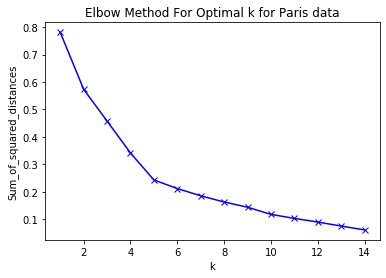

In [174]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km_P = KMeans(n_clusters=k, random_state=0)
    km_P = km_P.fit(paris_grouped_clustering)
    Sum_of_squared_distances.append(km_P.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k for Paris data')
plt.show()

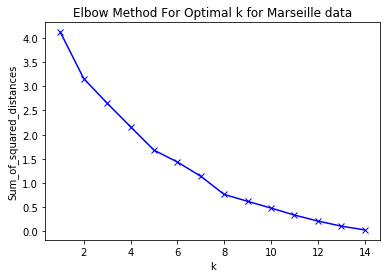

In [175]:
marseille_grouped_clustering = marseille_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km_M = KMeans(n_clusters=k, random_state=0)
    km_M = km_M.fit(marseille_grouped_clustering)
    Sum_of_squared_distances.append(km_M.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k for Marseille data')
plt.show()

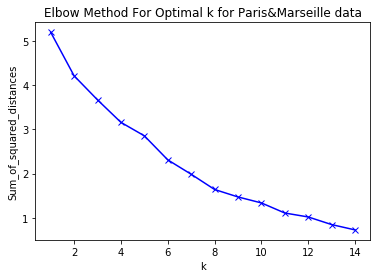

In [176]:
paris_marseille_grouped_clustering = paris_marseille_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km_PM = KMeans(n_clusters=k, random_state=0)
    km_PM = km_PM.fit(paris_marseille_grouped_clustering)
    Sum_of_squared_distances.append(km_PM.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k for Paris&Marseille data')
plt.show()

### Run k-Means clustering with optimal k values for each data frame###

In [204]:
#Paris k=5
kcl_P = 5
km_P = KMeans(n_clusters=kcl_P, random_state=0).fit(paris_grouped_clustering)
#Marseille k=5
kcl_M = 5
km_M = KMeans(n_clusters=kcl_M, random_state=0).fit(marseille_grouped_clustering)
#Paris&Marseille k=8
kcl_PM = 8
km_PM = KMeans(n_clusters=kcl_PM, random_state=0).fit(paris_marseille_grouped_clustering)

### Add clustering labels to the data frames ###

In [121]:
#Paris
clusters_P = neighborhoods_venues_sorted_P.copy()
clusters_P.insert(0, 'Cluster Labels', km_P.labels_)
paris_merged = districts_Par
paris_merged = paris_merged.merge(clusters_P.set_index('Neighborhood'), left_on='L_AR', right_on='Neighborhood')
paris_merged.head() 

,NOM_COM,CODE_VILLE,Latitude,Longitude,VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PARIS-1ER-ARRONDISSEMENT,75056,48.862526,2.336301,PARIS,1ER,ARRONDISSEMENT,1,1,French Restaurant,Hotel,Café,Japanese Restaurant,Coffee Shop,Plaza,Bakery,Art Museum,Korean Restaurant,Restaurant
1,PARIS-2E-ARRONDISSEMENT,75056,48.868218,2.342690,PARIS,2E,ARRONDISSEMENT,2,1,French Restaurant,Wine Bar,Cocktail Bar,Bistro,Italian Restaurant,Bakery,Hotel,Japanese Restaurant,Restaurant,Indie Movie Theater
2,PARIS-3E-ARRONDISSEMENT,75056,48.862885,2.359932,PARIS,3E,ARRONDISSEMENT,3,1,French Restaurant,Café,Coffee Shop,Burger Joint,Gourmet Shop,Boutique,Bistro,Italian Restaurant,Chinese Restaurant,Moroccan Restaurant
3,PARIS-4E-ARRONDISSEMENT,75056,48.854287,2.357596,PARIS,4E,ARRONDISSEMENT,4,1,French Restaurant,Hotel,Ice Cream Shop,Pastry Shop,Italian Restaurant,Wine Bar,Pedestrian Plaza,Art Gallery,Clothing Store,Tea Room
4,PARIS-5E-ARRONDISSEMENT,75056,48.844409,2.350498,PARIS,5E,ARRONDISSEMENT,5,1,French Restaurant,Italian Restaurant,Bar,Plaza,Hotel,Science Museum,Café,Coffee Shop,Bakery,Museum


In [123]:
#Marseille
clusters_M = neighborhoods_venues_sorted_M.copy()
clusters_M.insert(0, 'Cluster Labels', km_M.labels_)
marseille_merged = districts_Mar
marseille_merged = marseille_merged .merge(clusters_M.set_index('Neighborhood'), left_on='L_AR', right_on='Neighborhood')
marseille_merged.head() 

,NOM_COM,CODE_VILLE,Latitude,Longitude,VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MARSEILLE-1ER-ARRONDISSEMENT,13055,43.299929,5.383042,MARSEILLE,1ER,ARRONDISSEMENT,1,1,Hotel,French Restaurant,Tram Station,Rental Car Location,Fast Food Restaurant,Café,Plaza,Middle Eastern Restaurant,Supermarket,Department Store
1,MARSEILLE-2E-ARRONDISSEMENT,13055,43.312716,5.363439,MARSEILLE,2E,ARRONDISSEMENT,2,1,Tram Station,Boat or Ferry,Train Station,Hotel,Concert Hall,Multiplex,Nightclub,Tapas Restaurant,Bed & Breakfast,Coffee Shop
2,MARSEILLE-3E-ARRONDISSEMENT,13055,43.311742,5.379325,MARSEILLE,3E,ARRONDISSEMENT,3,1,Theater,Plaza,Concert Hall,Dessert Shop,Tram Station,Dance Studio,Church,Coffee Shop,Cosmetics Shop,Cupcake Shop
3,MARSEILLE-4E-ARRONDISSEMENT,13055,43.306695,5.401118,MARSEILLE,4E,ARRONDISSEMENT,4,1,Home Service,Hotel,Metro Station,Bistro,Tram Station,Department Store,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio
4,MARSEILLE-5E-ARRONDISSEMENT,13055,43.292401,5.397865,MARSEILLE,5E,ARRONDISSEMENT,5,1,Grocery Store,Bed & Breakfast,Food & Drink Shop,Fast Food Restaurant,Pub,Bistro,Pizza Place,Supermarket,Bakery,Bar


In [205]:
#Paris & Marseille
clusters_PM = neighborhoods_venues_sorted_PM.copy()
clusters_PM.insert(0, 'Cluster Labels', km_PM.labels_)
paris_marseille_merged = districts_Par_Mar
paris_marseille_merged = paris_marseille_merged.merge(clusters_PM.set_index('Neighborhood'), left_on='L_V_AR', right_on='Neighborhood')
paris_marseille_merged.head()

,NOM_COM,CODE_VILLE,Latitude,Longitude,VILLE,L_AR,Type,Nbr,L_V_AR,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PARIS-1ER-ARRONDISSEMENT,75056,48.862526,2.336301,PARIS,1ER,ARRONDISSEMENT,1,PARIS-1ER,0,French Restaurant,Hotel,Japanese Restaurant,Café,Coffee Shop,Plaza,Bakery,Korean Restaurant,Restaurant,Art Museum
1,PARIS-2E-ARRONDISSEMENT,75056,48.868218,2.342690,PARIS,2E,ARRONDISSEMENT,2,PARIS-2E,0,French Restaurant,Cocktail Bar,Wine Bar,Bistro,Restaurant,Japanese Restaurant,Italian Restaurant,Bakery,Hotel,Gym
2,PARIS-3E-ARRONDISSEMENT,75056,48.862885,2.359932,PARIS,3E,ARRONDISSEMENT,3,PARIS-3E,0,French Restaurant,Café,Coffee Shop,Burger Joint,Bistro,Boutique,Gourmet Shop,Wine Bar,Chinese Restaurant,Moroccan Restaurant
3,PARIS-4E-ARRONDISSEMENT,75056,48.854287,2.357596,PARIS,4E,ARRONDISSEMENT,4,PARIS-4E,0,French Restaurant,Hotel,Ice Cream Shop,Pastry Shop,Italian Restaurant,Wine Bar,Bakery,Tea Room,Art Gallery,Pedestrian Plaza
4,PARIS-5E-ARRONDISSEMENT,75056,48.844409,2.350498,PARIS,5E,ARRONDISSEMENT,5,PARIS-5E,0,French Restaurant,Italian Restaurant,Bar,Plaza,Science Museum,Hotel,Coffee Shop,Museum,Greek Restaurant,Pub


### Plotting the clusters ###

### Paris ###

In [216]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters_P = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kcl_P)
ys = [i + x + (i*x)**2 for i in range(kcl_P)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['L_AR'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_P)
       
map_clusters_P

### Marseille ###

In [243]:
# create map
map_clusters_M = folium.Map(location=[latitude_M, longitude_M], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kcl_M)
ys = [i + x + (i*x)**2 for i in range(kcl_M)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(marseille_merged['Latitude'], marseille_merged['Longitude'], marseille_merged['L_AR'], marseille_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_M)
       
map_clusters_M

### Paris and Marseille ###

In [219]:
# create map
map_clusters_PM = folium.Map(location=[(latitude+latitude_M)/2, (longitude+longitude_M)/2], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kcl_PM)
ys = [i + x + (i*x)**2 for i in range(kcl_PM)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_marseille_merged['Latitude'], paris_marseille_merged['Longitude'], paris_marseille_merged['L_V_AR'], paris_marseille_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_PM)
       
map_clusters_PM

## Clusters analysis##

### Paris clusters ###

**Let's look at the districts in clusters 0 to 4**

In [178]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,75056,7E,ARRONDISSEMENT,7,0,Hotel,French Restaurant,Café,Italian Restaurant,Plaza,History Museum,Cocktail Bar,Irish Pub,Japanese Restaurant,Historic Site
7,75056,8E,ARRONDISSEMENT,8,0,French Restaurant,Hotel,Thai Restaurant,Japanese Restaurant,Cocktail Bar,Corsican Restaurant,Spa,Bakery,Theater,Brewery
8,75056,9E,ARRONDISSEMENT,9,0,French Restaurant,Hotel,Bakery,Bistro,Wine Bar,Theater,Café,Cheese Shop,Pizza Place,Cocktail Bar
13,75056,14E,ARRONDISSEMENT,14,0,French Restaurant,Hotel,Italian Restaurant,Thai Restaurant,Convenience Store,Cosmetics Shop,Café,Fast Food Restaurant,Food & Drink Shop,Brasserie
16,75056,17E,ARRONDISSEMENT,17,0,French Restaurant,Hotel,Italian Restaurant,Plaza,Bistro,Bakery,Japanese Restaurant,Café,Art Museum,Chinese Restaurant


In [179]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75056,1ER,ARRONDISSEMENT,1,1,French Restaurant,Hotel,Café,Japanese Restaurant,Coffee Shop,Plaza,Bakery,Art Museum,Korean Restaurant,Restaurant
1,75056,2E,ARRONDISSEMENT,2,1,French Restaurant,Wine Bar,Cocktail Bar,Bistro,Italian Restaurant,Bakery,Hotel,Japanese Restaurant,Restaurant,Indie Movie Theater
2,75056,3E,ARRONDISSEMENT,3,1,French Restaurant,Café,Coffee Shop,Burger Joint,Gourmet Shop,Boutique,Bistro,Italian Restaurant,Chinese Restaurant,Moroccan Restaurant
3,75056,4E,ARRONDISSEMENT,4,1,French Restaurant,Hotel,Ice Cream Shop,Pastry Shop,Italian Restaurant,Wine Bar,Pedestrian Plaza,Art Gallery,Clothing Store,Tea Room
4,75056,5E,ARRONDISSEMENT,5,1,French Restaurant,Italian Restaurant,Bar,Plaza,Hotel,Science Museum,Café,Coffee Shop,Bakery,Museum
5,75056,6E,ARRONDISSEMENT,6,1,French Restaurant,Italian Restaurant,Bakery,Hotel,Wine Bar,Bistro,Pastry Shop,Tea Room,Ice Cream Shop,Cocktail Bar
9,75056,10E,ARRONDISSEMENT,10,1,French Restaurant,Coffee Shop,Hotel,Bistro,Indian Restaurant,Pizza Place,Café,Japanese Restaurant,Italian Restaurant,Bakery
10,75056,11E,ARRONDISSEMENT,11,1,French Restaurant,Restaurant,Café,Pastry Shop,Wine Bar,Bistro,Japanese Restaurant,Cocktail Bar,Bar,Pizza Place
14,75056,15E,ARRONDISSEMENT,15,1,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Indian Restaurant,Japanese Restaurant,Lebanese Restaurant,Thai Restaurant,Bakery,Park
17,75056,18E,ARRONDISSEMENT,18,1,French Restaurant,Bar,Italian Restaurant,Pizza Place,Hotel,Restaurant,Vietnamese Restaurant,Gastropub,Coffee Shop,Convenience Store


In [180]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,75056,12E,ARRONDISSEMENT,12,2,Zoo Exhibit,Bistro,Supermarket,Monument / Landmark,Zoo,Coworking Space,Creperie,Furniture / Home Store,French Restaurant,Fountain


In [181]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,75056,13E,ARRONDISSEMENT,13,3,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Italian Restaurant,Cambodian Restaurant,Plaza,Convenience Store


In [182]:
paris_merged.loc[paris_merged['Cluster Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,75056,16E,ARRONDISSEMENT,16,4,Plaza,Lake,Pool,Art Museum,Boat or Ferry,Bus Station,Bus Stop,Park,French Restaurant,Falafel Restaurant


**Paris clusters summary:**
- Cluster 0: Central-East districts of Paris
- Cluster 1: Central-West districts of Paris and 15th district (that is located in the East)
- Cluster 2: residential districts. Main venues include markets, stores, zoo
- Cluster 3: multicultural districts, specifically including lots of Asian restaurants
- Cluster 4: upscale districts. Main venues include plaza, pool, lake.

### Marseille clusters ###

**Let's look at the districts in clusters 0 to 4**

In [186]:
marseille_merged.loc[marseille_merged['Cluster Labels'] == 0, marseille_merged.columns[[1] + list(range(5, marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,13055,10E,ARRONDISSEMENT,10,0,Fast Food Restaurant,Big Box Store,Tram Station,Department Store,Coffee Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio,Electronics Store


In [187]:
marseille_merged.loc[marseille_merged['Cluster Labels'] == 1, marseille_merged.columns[[1] + list(range(5, marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,13055,1ER,ARRONDISSEMENT,1,1,Hotel,French Restaurant,Tram Station,Rental Car Location,Fast Food Restaurant,Café,Plaza,Middle Eastern Restaurant,Supermarket,Department Store
1,13055,2E,ARRONDISSEMENT,2,1,Tram Station,Boat or Ferry,Train Station,Hotel,Concert Hall,Multiplex,Nightclub,Tapas Restaurant,Bed & Breakfast,Coffee Shop
2,13055,3E,ARRONDISSEMENT,3,1,Theater,Plaza,Concert Hall,Dessert Shop,Tram Station,Dance Studio,Church,Coffee Shop,Cosmetics Shop,Cupcake Shop
3,13055,4E,ARRONDISSEMENT,4,1,Home Service,Hotel,Metro Station,Bistro,Tram Station,Department Store,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio
4,13055,5E,ARRONDISSEMENT,5,1,Grocery Store,Bed & Breakfast,Food & Drink Shop,Fast Food Restaurant,Pub,Bistro,Pizza Place,Supermarket,Bakery,Bar
5,13055,6E,ARRONDISSEMENT,6,1,Plaza,French Restaurant,Fast Food Restaurant,Italian Restaurant,Brasserie,Sandwich Place,Pub,Cupcake Shop,Coffee Shop,Hotel
6,13055,7E,ARRONDISSEMENT,7,1,Grocery Store,Plaza,Business Service,Pizza Place,Theater,Bakery,Chinese Restaurant,Food & Drink Shop,Food,Fast Food Restaurant
7,13055,8E,ARRONDISSEMENT,8,1,Mediterranean Restaurant,Business Service,Food,Thai Restaurant,Beach,Ice Cream Shop,Restaurant,Coffee Shop,Concert Hall,Cosmetics Shop
9,13055,11E,ARRONDISSEMENT,11,1,French Restaurant,Furniture / Home Store,Bowling Alley,Fast Food Restaurant,Stadium,Electronics Store,Multiplex,Coffee Shop,Concert Hall,Cosmetics Shop
11,13055,13E,ARRONDISSEMENT,13,1,Pizza Place,Thai Restaurant,Soccer Field,Department Store,Church,Coffee Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio


In [188]:
marseille_merged.loc[marseille_merged['Cluster Labels'] == 2, marseille_merged.columns[[1] + list(range(5, marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,13055,12E,ARRONDISSEMENT,12,2,Smoke Shop,Sushi Restaurant,Department Store,Church,Coffee Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio,Tram Station


In [189]:
marseille_merged.loc[marseille_merged['Cluster Labels'] == 3, marseille_merged.columns[[1] + list(range(5, marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,13055,14E,ARRONDISSEMENT,14,3,BBQ Joint,Memorial Site,Tram Station,Dessert Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio,Department Store,Electronics Store


In [190]:
marseille_merged.loc[marseille_merged['Cluster Labels'] == 4, marseille_merged.columns[[1] + list(range(5, marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,13055,16E,ARRONDISSEMENT,16,4,Seafood Restaurant,Tram Station,Department Store,Coffee Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Dance Studio,Dessert Shop,Chinese Restaurant


**Marseille clusters summary:**
- Cluster 1: Center area of Marseille. Most popular venues include hotels and restaurants. Interestingly, districts 11th, 13th, and 15th are in this cluster, too. 
- Clusters 0, 2, 3, 4: Other venues are more popular, including shops tram stations, etc. More knowledge about the city is necessary to provide better distinctions between these clusters

### Paris and Marseille clusters ###

In [207]:
paris_marseille_merged.loc[paris_marseille_merged['Cluster Labels'] == 0, paris_marseille_merged.columns[[1] + list(range(5, paris_marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,L_V_AR,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75056,1ER,ARRONDISSEMENT,1,PARIS-1ER,0,French Restaurant,Hotel,Japanese Restaurant,Café,Coffee Shop,Plaza,Bakery,Korean Restaurant,Restaurant,Art Museum
1,75056,2E,ARRONDISSEMENT,2,PARIS-2E,0,French Restaurant,Cocktail Bar,Wine Bar,Bistro,Restaurant,Japanese Restaurant,Italian Restaurant,Bakery,Hotel,Gym
2,75056,3E,ARRONDISSEMENT,3,PARIS-3E,0,French Restaurant,Café,Coffee Shop,Burger Joint,Bistro,Boutique,Gourmet Shop,Wine Bar,Chinese Restaurant,Moroccan Restaurant
3,75056,4E,ARRONDISSEMENT,4,PARIS-4E,0,French Restaurant,Hotel,Ice Cream Shop,Pastry Shop,Italian Restaurant,Wine Bar,Bakery,Tea Room,Art Gallery,Pedestrian Plaza
4,75056,5E,ARRONDISSEMENT,5,PARIS-5E,0,French Restaurant,Italian Restaurant,Bar,Plaza,Science Museum,Hotel,Coffee Shop,Museum,Greek Restaurant,Pub
5,75056,6E,ARRONDISSEMENT,6,PARIS-6E,0,French Restaurant,Italian Restaurant,Bakery,Wine Bar,Hotel,Bistro,Ice Cream Shop,Pastry Shop,Tea Room,Fountain
6,75056,7E,ARRONDISSEMENT,7,PARIS-7E,0,Hotel,French Restaurant,Café,Italian Restaurant,Plaza,Cocktail Bar,History Museum,Garden,Cheese Shop,Dessert Shop
7,75056,8E,ARRONDISSEMENT,8,PARIS-8E,0,French Restaurant,Hotel,Cocktail Bar,Japanese Restaurant,Bakery,Thai Restaurant,Theater,Corsican Restaurant,Spa,Cycle Studio
8,75056,9E,ARRONDISSEMENT,9,PARIS-9E,0,French Restaurant,Hotel,Bakery,Bistro,Wine Bar,Cheese Shop,Café,Burger Joint,Theater,Italian Restaurant
9,75056,10E,ARRONDISSEMENT,10,PARIS-10E,0,French Restaurant,Bistro,Coffee Shop,Hotel,Indian Restaurant,Japanese Restaurant,Pizza Place,Café,Breakfast Spot,Thai Restaurant


In [208]:
paris_marseille_merged.loc[paris_marseille_merged['Cluster Labels'] == 1, paris_marseille_merged.columns[[1] + list(range(5, paris_marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,L_V_AR,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,13055,14E,ARRONDISSEMENT,14,MARSEILLE-14E,1,Memorial Site,BBQ Joint,Zoo,Dessert Shop,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit


In [209]:
paris_marseille_merged.loc[paris_marseille_merged['Cluster Labels'] == 2, paris_marseille_merged.columns[[1] + list(range(5, paris_marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,L_V_AR,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,13055,10E,ARRONDISSEMENT,10,MARSEILLE-10E,2,Fast Food Restaurant,Big Box Store,Zoo,Food & Drink Shop,Flower Shop,Fish & Chips Shop,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant


In [210]:
paris_marseille_merged.loc[paris_marseille_merged['Cluster Labels'] == 3, paris_marseille_merged.columns[[1] + list(range(5, paris_marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,L_V_AR,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,13055,15E,ARRONDISSEMENT,15,MARSEILLE-15E,3,Women's Store,Men's Store,Bus Stop,Zoo,Dessert Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit


In [211]:
paris_marseille_merged.loc[paris_marseille_merged['Cluster Labels'] == 4, paris_marseille_merged.columns[[1] + list(range(5, paris_marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,L_V_AR,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,13055,16E,ARRONDISSEMENT,16,MARSEILLE-16E,4,Seafood Restaurant,Coffee Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Electronics Store,Donut Shop


In [212]:
paris_marseille_merged.loc[paris_marseille_merged['Cluster Labels'] == 5, paris_marseille_merged.columns[[1] + list(range(5, paris_marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,L_V_AR,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,13055,12E,ARRONDISSEMENT,12,MARSEILLE-12E,5,Sushi Restaurant,Smoke Shop,Zoo,Dessert Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant


In [213]:
paris_marseille_merged.loc[paris_marseille_merged['Cluster Labels'] == 6, paris_marseille_merged.columns[[1] + list(range(5, paris_marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,L_V_AR,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,13055,13E,ARRONDISSEMENT,13,MARSEILLE-13E,6,Pizza Place,Soccer Field,Thai Restaurant,Zoo,Department Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant


In [214]:
paris_marseille_merged.loc[paris_marseille_merged['Cluster Labels'] == 7, paris_marseille_merged.columns[[1] + list(range(5, paris_marseille_merged.shape[1]))]]

,CODE_VILLE,L_AR,Type,Nbr,L_V_AR,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,13055,3E,ARRONDISSEMENT,3,MARSEILLE-3E,7,Theater,Dessert Shop,Concert Hall,Plaza,Zoo,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit
26,13055,7E,ARRONDISSEMENT,7,MARSEILLE-7E,7,Business Service,Theater,Plaza,Pizza Place,Grocery Store,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Electronics Store


**Paris & Marseille clusters summary:**
- Cluster 0: Includes all districts from Paris and seven districts from Marseille (all of them from cluster 1 in Marseille clustering). This suggests that all Paris districts are quite similar to each other when compared to Marseille districts.
- Clusters 1-7: Outskirts of Marseille. More knowledge about the city is necessary to provide better distinctions between these clusters.

## Conclusions ##

Clustering is capable of grouping districts based on multiple features 
- Paris clusters match intuitive classification of central districts vs. outskirts
 - Interestingly, the 15th district show more similarities to the central districts
- Marseille clusters show similar clustering in terms of central districts
 -  8th,11th, 13th, and 15th districts are more similar to the central districts despite being geographically closer to the outskirts
 - Paris and Marseille clusters show that Paris clusters are very similar to each other when compared with Marseille